Exercise 01:

(8, 8)


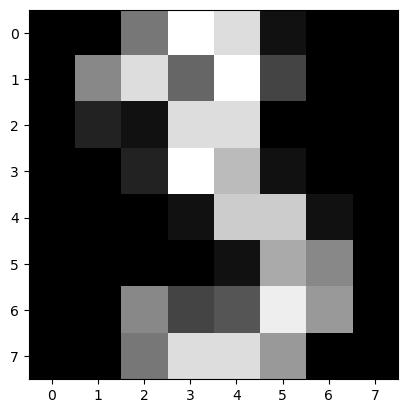

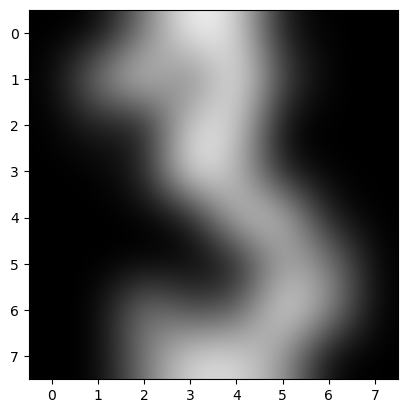

In [122]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import model_selection

digits = load_digits()
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

print(np.shape(images[0]))
#The images are of size 8x8

#Interpolate using nearest neighbor
img_nearest = images[3]
assert 2 == len (img_nearest.shape)
plt.figure()
plt.gray()
plt.imshow(img_nearest,interpolation = "nearest" ) # also try interpolation =" bicubic "
plt.show()

#Interpolate using bicubic
img_bicubic = images[3]
assert 2 == len (img_bicubic.shape)
plt.figure()
plt.gray()
plt.imshow(img_bicubic,interpolation = "bicubic" ) # also try interpolation =" bicubic "
plt.show()

x_3and9 = []
y_3and9 = []
image_3and9 = []
for i in range(len(data)):
    if target[i] == 3 or target[i] == 9:
        x_3and9.append(data[i])
        y_3and9.append(target[i]) 
        image_3and9.append(images[i])

X_train, X_test, y_train, y_test =\
    model_selection.train_test_split(x_3and9, y_3and9, test_size = 0.4, random_state = 0)


Exercise 04:

In [167]:
def relu(t):
    if( t <= 0):
        return 0
    elif(t > 0):
        return t

# Calculate the loss for the svm approach
def calculate_loss(training_features, training_labels, beta, b, lam):
    n = len(training_labels)
    sum = 0
    for i in range(n):
        sum += relu(1 - (training_labels[i]*(training_features[i].dot(beta) + b)))

    loss = ((1/2) * (np.transpose(beta).dot(beta))) + ((lam/n) * sum)
    
    return loss

# Calculate the loss derivation by deriving for beta
def calculate_loss_derive_beta(training_features, training_labels, beta, b, lam):
    sum = 0
    n = len(training_labels)
    for i in range(n):
        if((training_labels[i] * (training_features[i].dot(beta) + b)) < 1):
            sum += (-training_labels[i] * np.transpose(training_features[i].reshape(1,len(training_features[i]))))
             
    return beta + ((lam/n)*sum)

# Calculate the loss derivation by deriving for b
def calculate_loss_derive_b(training_features, training_labels, beta, b, lam):
    sum = 0
    n = len(training_labels)

    for i in range(n):
        if((training_labels[i] * (training_features[i].dot(beta) + b)) < 1):
            sum += (-training_labels[i])

    return (lam/n)*sum

def fit_svm(training_features, training_labels, beta, b, lam, learning_rate):
    #Calculate loss for current beta and b
    loss = calculate_loss(training_features, training_labels, beta, b, lam)
    
    #calculate new beta and b
    new_beta = beta - learning_rate * calculate_loss_derive_beta(training_features, training_labels, beta, b, lam)
    new_b = b - learning_rate * calculate_loss_derive_b(training_features, training_labels, beta, b, lam)

    return loss, new_beta, new_b

def predict_svm(beta, b, test_features):
    predicted_labels = []
    for i in range(len(test_features)):
        predicted_label = np.sign(test_features[i].dot(beta) + b)
        predicted_labels.append(predicted_label[0])
    return predicted_labels

def verify_prediction_svm(predicted_labels, test_labels):
    correct_labels = 0
    total_labels = len(predicted_labels)
    for i in range(total_labels):
        if (predicted_labels[i] == test_labels[i]):
            correct_labels += 1
        elif (predicted_labels[i] == test_labels[i]):
            correct_labels += 1
    return correct_labels/total_labels
        

def train_and_verify_svm(training_features, training_labels, lam, steps, learning_rate):
    # Initialize required variables
    number_of_features = len(training_features[0])
    beta = np.random.normal(size=(number_of_features, 1))
    b = 0
    losses = []
    training_errors = []
    training_rate_adjusted = False

    for i in range(steps):
        loss, beta, b = fit_svm(training_features, training_labels, beta, b, lam, learning_rate)
        losses.append(loss)

        predicted_labels = predict_svm(beta, b, training_features)
        training_error = verify_prediction_svm(predicted_labels, training_labels)
        training_errors.append(training_error)

        if len(training_errors) > 1:
            if(training_errors[-1] == training_errors[-2] and not training_rate_adjusted):
                training_rate_adjusted = True
                learning_rate = learning_rate/10

    return beta, b, losses, training_errors

# x_train is an N x D matrix, where N is the number of training instances and D is the number of relevant pixels
# y_train is a N-Dimensional vector containing the correct labels.
for i in range(len(y_train)):
    if(y_train[i] == 3):
        y_train[i] = -1
    elif(y_train[i] == 9):
        y_train[i] = 1

for i in range(len(y_test)):
    if(y_test[i] == 3):
        y_test[i] = -1
    elif(y_test[i] == 9):
        y_test[i] = 1

lam = 1
steps = 1000
learning_rate = 0.1

beta, b, losses, training_errors = train_and_verify_svm(X_train, y_train, lam, steps, learning_rate)

predicted_labels = predict_svm(beta, b, X_test)
print(verify_prediction_svm(predicted_labels, y_test))





[[1.29323712e-311 1.29325200e-311 1.29321690e-311 6.95258148e-310
  6.95258148e-310 6.95258143e-310 6.95258148e-310 6.95258143e-310
  6.95258143e-310 6.95258143e-310 6.95258143e-310 6.95258143e-310
  6.95258143e-310 6.95258143e-310 6.95258143e-310 6.95258143e-310
  6.95258148e-310 6.95258148e-310 6.95258148e-310 1.29329071e-311
  6.95258148e-310 6.95258148e-310 6.95258143e-310 1.29329071e-311
  6.95258143e-310 6.95258143e-310 6.95258148e-310 6.95258148e-310
  6.95258148e-310 6.95258148e-310 6.95258143e-310 6.95258148e-310
  6.95258143e-310 6.95258143e-310 6.95258148e-310 6.95258148e-310
  1.29329071e-311 6.95258148e-310 6.95258148e-310 6.95258148e-310
  6.95258148e-310 6.95258148e-310 1.29329071e-311 6.95258148e-310
  6.95258148e-310 6.95258143e-310 6.95258148e-310 6.95258143e-310
  6.95258143e-310 6.95258148e-310 6.95258148e-310 6.95258148e-310
  6.95258148e-310 6.95258143e-310 6.95258148e-310 6.95258143e-310
  6.95258143e-310 6.95258148e-310 6.95258148e-310 1.29329071e-311
  6.952581

ValueError: cannot reshape array of size 1984 into shape (186,64)